# # Classification

## ## 모델 생성 및 저장

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

## Data Set 준비

In [7]:
df = pd.read_csv('data/iris.csv')
df = df.drop(['Id'], axis=1)
df = df.iloc[np.random.permutation(len(df))]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,7.7,3.0,6.1,2.3,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica


In [8]:
# 타겟 변수 제외한 다른 변수들로 이루어진 데이터 프레임 df_x 설정
df_x = df.drop(['Species'], axis=1)
df_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
135,7.7,3.0,6.1,2.3
126,6.2,2.8,4.8,1.8
16,5.4,3.9,1.3,0.4
84,5.4,3.0,4.5,1.5
140,6.7,3.1,5.6,2.4


In [9]:
# 타겟 변수로 이루어진 데이터 프레임 df_y 설정
df_y = pd.DataFrame()
df_y['Species'] = df['Species']
df_y.head()

,Species
135,Iris-virginica
126,Iris-virginica
16,Iris-setosa
84,Iris-versicolor
140,Iris-virginica


In [11]:
# as_matrix 사용해 알고리즘에 적용하기 위한 ndarray 형식으로 변환
x = df_x.as_matrix()
y = df_y.as_matrix()
y = y.ravel()

In [12]:
# 데이터의 20%를 test set으로, 80%를 train set으로 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
# 트리 100개로 구성된 random forest classifier 생성
clf = RandomForestClassifier(n_estimators=100)

# fit 함수를 사용한 모델 훈련
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
#model save
joblib.dump(clf, 'randomforest_classifier.pkl')

['randomforest_classifier.pkl']

## ## 모델 로드 및 분류

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

In [ ]:
df = pd.read_csv('data/iris.csv')
df = df.drop(['Id'], axis=1)
df = df.iloc[np.random.permutation(len(df))]
df.head()

In [ ]:
# 타겟 변수 제외한 다른 변수들로 이루어진 데이터 프레임 df_x 설정
df_x = df.drop(['Species'], axis=1)
df_x.head()

In [ ]:
# 타겟 변수로 이루어진 데이터 프레임 df_y 설정
df_y = pd.DataFrame()
df_y['Species'] = df['Species']
df_y.head()

In [ ]:
# as_matrix 사용해 알고리즘에 적용하기 위한 ndarray 형식으로 변환
x = df_x.as_matrix()
y = df_y.as_matrix()
y = y.ravel()

In [ ]:
# 데이터의 20%를 test set으로, 80%를 train set으로 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
# model load
rf_clf = joblib.load('randomforest_classifier.pkl')

In [17]:
# predict 함수를 사용한 test set에 대한 분류
y_pred = rf_clf.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [24]:
# 모델 성능 평가
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, y_pred))
print('\n Classification Report \n')
print(classification_report(y_test, y_pred))
print('\n Accuracy \n')
print(accuracy_score(y_test, y_pred, normalize=True))


 Confusion Matrix 

[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]

 Classification Report 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30


 Accuracy 

0.933333333333


In [25]:
df_result = pd.DataFrame(data=x_test, columns=df_x.columns)
df_result['Species'] = pd.Series(y_test)
df_result['SpeciesPredicted'] = pd.Series(y_pred)
df_result.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesPredicted
0,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
1,5.0,3.4,1.6,0.4,Iris-setosa,Iris-setosa
2,6.0,2.7,5.1,1.6,Iris-versicolor,Iris-virginica
3,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa
4,6.1,2.8,4.7,1.2,Iris-versicolor,Iris-versicolor


In [26]:
df_result.to_csv('data/iris_result.csv')

# # Regression

## ## 모델 생성 및 저장

In [27]:
import pandas as pd
import numpy as np

# 데이터 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# 모델 export, save
from sklearn.externals import joblib

In [29]:
df = pd.read_csv('data/AutomobileDataSet.csv')
df = df.replace("?", np.nan)
df = df.dropna()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [30]:
df[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','city-mpg','highway-mpg']] = \
df[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','city-mpg','highway-mpg']].astype(float)

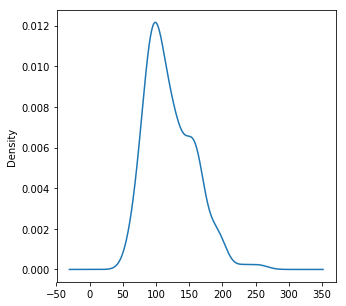

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

# density plot
df['normalized-losses'].plot.kde()

In [32]:
df['normalized-losses'] = StandardScaler().fit_transform(df['normalized-losses'].values.reshape(-1,1))
df['wheel-base'] = StandardScaler().fit_transform(df['wheel-base'].values.reshape(-1,1))
df['length'] = StandardScaler().fit_transform(df['length'].values.reshape(-1,1))
df['width'] = StandardScaler().fit_transform(df['width'].values.reshape(-1,1))
df['height'] = StandardScaler().fit_transform(df['height'].values.reshape(-1,1))
df['curb-weight'] = StandardScaler().fit_transform(df['curb-weight'].values.reshape(-1,1))
df['bore'] = StandardScaler().fit_transform(df['bore'].values.reshape(-1,1))
df['stroke'] = StandardScaler().fit_transform(df['stroke'].values.reshape(-1,1))
df['compression-ratio'] = StandardScaler().fit_transform(df['compression-ratio'].values.reshape(-1,1))
df['horsepower'] = StandardScaler().fit_transform(df['horsepower'].values.reshape(-1,1))
df['peak-rpm'] = StandardScaler().fit_transform(df['peak-rpm'].values.reshape(-1,1))
df['city-mpg'] = StandardScaler().fit_transform(df['city-mpg'].values.reshape(-1,1))
df['highway-mpg'] = StandardScaler().fit_transform(df['highway-mpg'].values.reshape(-1,1))
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,1.206222,audi,gas,std,four,sedan,fwd,front,0.298157,...,109,mpfi,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,13950
4,2,1.206222,audi,gas,std,four,sedan,4wd,front,0.220504,...,136,mpfi,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,17450
6,1,1.037394,audi,gas,std,four,sedan,fwd,front,1.462948,...,136,mpfi,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,17710
8,1,1.037394,audi,gas,turbo,four,sedan,fwd,front,1.462948,...,131,mpfi,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,23875
10,2,1.994089,bmw,gas,std,two,sedan,rwd,front,0.569942,...,108,mpfi,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,16430


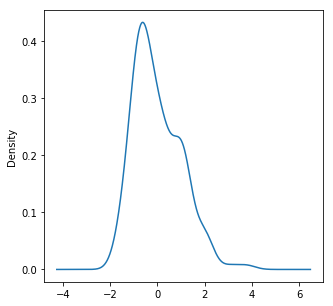

In [33]:
plt.figure(figsize=(5,5))
df['normalized-losses'].plot.kde()

In [34]:
df['symboling'] = LabelEncoder().fit_transform(df['symboling'])
df['make'] = LabelEncoder().fit_transform(df['make'])
df['fuel-type'] = LabelEncoder().fit_transform(df['fuel-type'])
df['aspiration'] = LabelEncoder().fit_transform(df['aspiration'])
df['num-of-doors'] = LabelEncoder().fit_transform(df['num-of-doors'])
df['body-style'] = LabelEncoder().fit_transform(df['body-style'])
df['drive-wheels'] = LabelEncoder().fit_transform(df['drive-wheels'])
df['engine-location'] = LabelEncoder().fit_transform(df['engine-location'])
df['engine-type'] = LabelEncoder().fit_transform(df['engine-type'])
df['num-of-cylinders'] = LabelEncoder().fit_transform(df['num-of-cylinders'])
df['engine-size'] = LabelEncoder().fit_transform(df['engine-size'])
df['fuel-system'] = LabelEncoder().fit_transform(df['fuel-system'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,4,1.206222,0,1,0,0,3,1,0,0.298157,...,9,4,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,13950
4,4,1.206222,0,1,0,0,3,0,0,0.220504,...,17,4,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,17450
6,3,1.037394,0,1,0,0,3,1,0,1.462948,...,17,4,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,17710
8,3,1.037394,0,1,1,0,3,1,0,1.462948,...,15,4,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,23875
10,4,1.994089,1,1,0,1,3,2,0,0.569942,...,8,4,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,16430


In [35]:
# 타겟 변수 제외한 다른 변수들로 이루어진 데이터 프레임 df_x 설정
df_x = df.drop(['price'], axis=1)
df_x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,4,1.206222,0,1,0,0,3,1,0,0.298157,...,2,9,4,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313
4,4,1.206222,0,1,0,0,3,0,0,0.220504,...,1,17,4,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772
6,3,1.037394,0,1,0,0,3,1,0,1.462948,...,1,17,4,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850
8,3,1.037394,0,1,1,0,3,1,0,1.462948,...,1,15,4,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386
10,4,1.994089,1,1,0,1,3,2,0,0.569942,...,2,8,4,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620


In [36]:
# 타겟 변수로 이루어진 데이터 프레임 df_y 설정
df_y = pd.DataFrame()
df_y['price'] = df['price']
df_y.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [38]:
# as_matrix 사용해 알고리즘에 적용하기 위한 ndarray 형식으로 변환
x = df_x.as_matrix()
y = df_y.as_matrix()
y = y.ravel()

In [39]:
# 데이터의 20%를 test set으로, 80%를 train set으로 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
# 트리 100개로 구성된 random forest classifier 생성
estimator = RandomForestClassifier(n_estimators=100)

# fit 함수를 사용한 모델 훈련
estimator.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
# model save
joblib.dump(estimator, 'randomforest_regressor.pkl')

['randomforest_regressor.pkl']

## ## 모델 로드 및 예측

In [58]:
import pandas as pd
import numpy as np

# 데이터 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# 모델 성능 측정을 위한 패키지
from math import sqrt
from sklearn.metrics import mean_squared_error

# 모델 export, save
from sklearn.externals import joblib

In [59]:
df = pd.read_csv('data/AutomobileDataSet.csv')
df = df.replace("?", np.nan)
df = df.dropna()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [60]:
df[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','city-mpg','highway-mpg']] = \
df[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','city-mpg','highway-mpg']].astype(float)

In [61]:
df['normalized-losses'] = StandardScaler().fit_transform(df['normalized-losses'].values.reshape(-1,1))
df['wheel-base'] = StandardScaler().fit_transform(df['wheel-base'].values.reshape(-1,1))
df['length'] = StandardScaler().fit_transform(df['length'].values.reshape(-1,1))
df['width'] = StandardScaler().fit_transform(df['width'].values.reshape(-1,1))
df['height'] = StandardScaler().fit_transform(df['height'].values.reshape(-1,1))
df['curb-weight'] = StandardScaler().fit_transform(df['curb-weight'].values.reshape(-1,1))
df['bore'] = StandardScaler().fit_transform(df['bore'].values.reshape(-1,1))
df['stroke'] = StandardScaler().fit_transform(df['stroke'].values.reshape(-1,1))
df['compression-ratio'] = StandardScaler().fit_transform(df['compression-ratio'].values.reshape(-1,1))
df['horsepower'] = StandardScaler().fit_transform(df['horsepower'].values.reshape(-1,1))
df['peak-rpm'] = StandardScaler().fit_transform(df['peak-rpm'].values.reshape(-1,1))
df['city-mpg'] = StandardScaler().fit_transform(df['city-mpg'].values.reshape(-1,1))
df['highway-mpg'] = StandardScaler().fit_transform(df['highway-mpg'].values.reshape(-1,1))
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,1.206222,audi,gas,std,four,sedan,fwd,front,0.298157,...,109,mpfi,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,13950
4,2,1.206222,audi,gas,std,four,sedan,4wd,front,0.220504,...,136,mpfi,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,17450
6,1,1.037394,audi,gas,std,four,sedan,fwd,front,1.462948,...,136,mpfi,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,17710
8,1,1.037394,audi,gas,turbo,four,sedan,fwd,front,1.462948,...,131,mpfi,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,23875
10,2,1.994089,bmw,gas,std,two,sedan,rwd,front,0.569942,...,108,mpfi,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,16430


In [62]:
df['symboling'] = LabelEncoder().fit_transform(df['symboling'])
df['make'] = LabelEncoder().fit_transform(df['make'])
df['fuel-type'] = LabelEncoder().fit_transform(df['fuel-type'])
df['aspiration'] = LabelEncoder().fit_transform(df['aspiration'])
df['num-of-doors'] = LabelEncoder().fit_transform(df['num-of-doors'])
df['body-style'] = LabelEncoder().fit_transform(df['body-style'])
df['drive-wheels'] = LabelEncoder().fit_transform(df['drive-wheels'])
df['engine-location'] = LabelEncoder().fit_transform(df['engine-location'])
df['engine-type'] = LabelEncoder().fit_transform(df['engine-type'])
df['num-of-cylinders'] = LabelEncoder().fit_transform(df['num-of-cylinders'])
df['engine-size'] = LabelEncoder().fit_transform(df['engine-size'])
df['fuel-system'] = LabelEncoder().fit_transform(df['fuel-system'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,4,1.206222,0,1,0,0,3,1,0,0.298157,...,9,4,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313,13950
4,4,1.206222,0,1,0,0,3,0,0,0.220504,...,17,4,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772,17450
6,3,1.037394,0,1,0,0,3,1,0,1.462948,...,17,4,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850,17710
8,3,1.037394,0,1,1,0,3,1,0,1.462948,...,15,4,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386,23875
10,4,1.994089,1,1,0,1,3,2,0,0.569942,...,8,4,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620,16430


In [63]:
# 타겟 변수 제외한 다른 변수들로 이루어진 데이터 프레임 df_x 설정
df_x = df.drop(['price'], axis=1)
df_x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,4,1.206222,0,1,0,0,3,1,0,0.298157,...,2,9,4,-0.413240,0.556703,-0.041559,0.201279,0.831733,-0.414945,-0.323313
4,4,1.206222,0,1,0,0,3,0,0,0.220504,...,1,17,4,-0.413240,0.556703,-0.557392,0.625812,0.831733,-1.402122,-1.565772
6,3,1.037394,0,1,0,0,3,1,0,1.462948,...,1,17,4,-0.413240,0.556703,-0.428433,0.462530,0.831733,-1.237593,-1.099850
8,3,1.037394,0,1,1,0,3,1,0,1.462948,...,1,15,4,-0.638386,0.556703,-0.480017,1.442223,0.831733,-1.566652,-1.876386
10,4,1.994089,1,1,0,1,3,2,0,0.569942,...,2,8,4,0.750015,-1.484399,-0.351058,0.168622,1.477884,-0.579475,-0.478620


In [64]:
# 타겟 변수로 이루어진 데이터 프레임 df_y 설정
df_y = pd.DataFrame()
df_y['price'] = df['price']
df_y.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [65]:
# as_matrix 사용해 알고리즘에 적용하기 위한 ndarray 형식으로 변환
x = df_x.as_matrix()
y = df_y.as_matrix()
y = y.ravel()

In [66]:
# 데이터의 20%를 test set으로, 80%를 train set으로 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [67]:
# model load
estimator = joblib.load('randomforest_regressor.pkl')

In [68]:
# predict 함수를 사용한 test set에 대한 분석
y_pred = estimator.predict(x_test)

In [69]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

1419.328901717287

In [73]:
df_result = pd.DataFrame(data=x_test, columns=df_x.columns)
df_result['price'] = pd.Series(y_test)
df_result['pricePredicted'] = pd.Series(y_pred)
df_result.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,pricePredicted
0,3.0,1.318775,15.0,1.0,0.0,1.0,2.0,2.0,0.0,-0.730741,...,4.0,-0.225618,-0.531885,-0.196308,0.527843,3.200952,-0.085886,-0.478620,9538,9298
1,3.0,0.193250,9.0,1.0,0.0,1.0,2.0,1.0,0.0,-0.730741,...,1.0,-0.563337,0.182501,-0.196308,-0.876384,0.185582,0.736761,0.763839,7799,7799
2,4.0,-0.763445,16.0,0.0,0.0,0.0,3.0,1.0,0.0,-0.187172,...,2.0,-1.088678,0.556703,3.311356,-1.431543,-0.675952,1.723938,2.161605,7995,9495
3,1.0,-0.735307,17.0,1.0,0.0,0.0,3.0,2.0,0.0,2.103582,...,4.0,1.800697,-0.293756,-0.170517,0.593156,0.616349,-0.579475,-0.633928,16845,16845
4,1.0,-0.791583,7.0,0.0,1.0,0.0,4.0,2.0,0.0,2.278301,...,2.0,1.050210,1.373144,2.924481,0.887064,-1.645178,-0.744004,-1.099850,28248,28248
